In [2]:
from numpy import *
from qutip  import *
from matplotlib.pyplot import *
import numpy as np
import qutip as qt
from qutip import *
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def H_sEIT(N,del_c, del_p, Omega_c, Omega_p, chi,kappa,Gamma):
    # Hamiltonian form is given by equation 7.3 from Novokov's thesis
    #del_c = w_c-w_q
    #del_p = w_p-w_ca
    g =basis(2,0)
    e = basis(2,1)
    
    term1 = (chi-del_p)*tensor(g*g.dag(),num(N+1))
    term2 = -((chi+del_p)*tensor(e*e.dag(),num(N+1))+del_c*tensor(e*e.dag(),qeye(N+1)))
    term3 = (Omega_c/2)*tensor(e*g.dag(),qeye(N+1))
    term4 = (Omega_p/2)*tensor(e*e.dag(),create(N+1)) 
    term5 = (Omega_p/2)*tensor(g*g.dag(),create(N+1)) 
    
    H = term1 + term2 + term3 + term4 + term5 + (term3+term4+term5).dag()  
    
    A_cav   = tensor(qeye(2),destroy(N+1))*np.sqrt(kappa)
    A_relax = tensor(destroy(2),qeye(N+1))*np.sqrt(Gamma)
#     A_dephase = tensor( sigmaz(), qeye(N+1)) * np.sqrt(dephase)
    return H,[A_cav,A_relax]

In [4]:
def sEIT_Spectrum(N,Omega_c, Omega_p, 
                 chi, kappa, Gamma,
                 del_list,
                 del_control, control="Probe"):
    
    spec = np.zeros(len( del_list), dtype=np.float64)

    
    def spectrum(H, c_ops):
        rho_ss= steadystate(H, c_ops,solver='scipy')
        spec = (rho_ss[N+1,N+2]+rho_ss[N+2,N+3]+rho_ss[0,1]+rho_ss[1,2]).imag#(rho_ss[N+1,N+2]+rho_ss[N+2,N+3]+rho_ss[0,1]+rho_ss[1,2]).imag#(rho_ss[N+1,N+2]+rho_ss[0,1]).imag
        return spec
    
    if control=="Probe":
        for i, del_c in enumerate(del_list):
            H ,c_ops = H_sEIT(N,del_c,del_control, Omega_c, Omega_p, chi,kappa,Gamma)
            spec[i] = spectrum(H ,c_ops)
    
    else:
        for i, del_p in enumerate(del_list):
            H ,c_ops = H_sEIT(N,del_control,del_p, Omega_c, Omega_p, chi,kappa,Gamma)
            spec[i] = spectrum(H ,c_ops)
            
    return spec

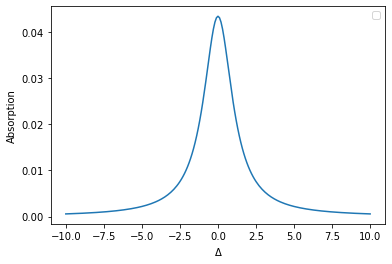

In [14]:
N=2
start=-10
end=10
point=201
del_control=0
chi = 0* (2*np.pi) #dispersive shift
Omega_p = 0.1* (2*np.pi)

kappa = 2.3 * (2*np.pi)
Gamma = 0#0.1 * (2*np.pi)

del_list = 2*pi*np.linspace(start, end, point)
sweep_range=1
resolution=11

#detune = 2*pi*linspace(-sweep_range,sweep_range,resolution)
z = np.zeros((resolution,point))
detune=[0.2]
for i ,Omega_c in enumerate(detune):
    z[i]= sEIT_Spectrum(N, Omega_c* (2*np.pi), Omega_p, chi,kappa,Gamma,del_list,del_control,control="Couple")
    plt.plot(del_list/(2*pi), z[i])
    plt.xlabel("$\Delta$")
    plt.ylabel("Absorption")
plt.legend()

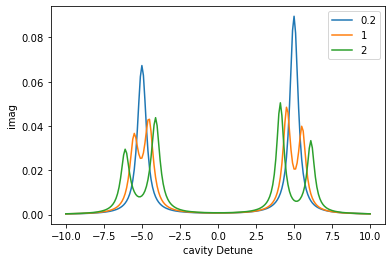

In [5]:
N=2
start=-10
end=10
point=201
del_control=0
chi = 5* (2*np.pi) #dispersive shift
Omega_p = 0.1* (2*np.pi)

kappa = 0.5 * (2*np.pi)
Gamma = 0.1 * (2*np.pi)

del_list = 2*pi*np.linspace(start, end, point)
sweep_range=1
resolution=11

#detune = 2*pi*linspace(-sweep_range,sweep_range,resolution)
z = np.zeros((resolution,point))
detune=[0.2,1,2]
for i ,Omega_c in enumerate(detune):
    z[i]= sEIT_Spectrum(N, Omega_c* (2*np.pi), Omega_p, chi,kappa,Gamma,del_list,del_control,control="Couple")
    plt.plot(del_list/(2*pi), z[i],label=Omega_c)
    plt.xlabel("cavity Detune")
    plt.ylabel("imag")
plt.legend()